*   Name: linqian shen
*   Class: ALY6015
*   Term: winter A 2020
*   Last Update: 2/11/2020

**Setup environment (libraries and packages)**

In [0]:
#Builds 'n Installs
#!pip install scipy==1.2
!pip install -q --upgrade scipy;
!pip install -q --upgrade quandl;
!pip install -q --upgrade pandas-datareader;
!pip install -q --upgrade statsmodels;

     |████████████████████████████████| 112kB 2.9MB/s 
     |████████████████████████████████| 8.7MB 2.9MB/s 


In [0]:
!pip install pyramid-arima;
from pyramid.arima import auto_arima

     |████████████████████████████████| 604kB 3.0MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [0]:
import requests
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import io
import scipy
import quandl
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
from sklearn.metrics import mean_squared_error
import pip
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from numpy import mean
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
url = "https://docs.google.com/spreadsheets/d/1aqdsyuXq5xtLEb1A3h60tL9o8kxmAGhfR3xbbueV-UA/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)
print(df.head())

  SITE_ID  YEAR  WEEK              DATEON  ... NA_CONC  MG_CONC  K_CONC  CL_CONC
0  CON186  2008    12  03/18/2008 9:00:00  ...   0.090    0.035   0.037    0.014
1  CON186  2006    10  03/07/2006 9:00:00  ...   0.134    0.023   0.014    0.048
2  CON186  2009    11  03/10/2009 9:00:00  ...   0.373    0.069   0.051    0.014
3  CON186  2006    12  03/21/2006 9:00:00  ...   0.191    0.051   0.045    0.053
4  CON186  2010    10  03/02/2010 9:00:00  ...   0.207    0.031   0.025    0.164

[5 rows x 16 columns]


**Data Cleaning and formatting**


In [0]:
df_new = df.sort_values(['YEAR', 'WEEK'], ascending=[True, True])
df_new =df_new.where((df_new['YEAR']>=1998) & (df_new['YEAR']<=2018))
df_new =df_new.dropna()
df_new['formatted_date'] = df_new.YEAR * 1000 + df_new.WEEK * 10 + 0
df_new['date'] = pd.to_datetime(df_new['formatted_date'], format='%Y%W%w')
df_new = df_new.groupby('date', as_index=False, sort=False)['SO2_CONC'].mean()

In [0]:
print(df_new.head())

        date  SO2_CONC
0 2003-08-17  0.637143
1 2003-08-24  0.972143
2 2003-08-31  0.601143
3 2003-09-07  0.734286
4 2003-09-14  0.452714


In [0]:
print(df_new.tail())

          date  SO2_CONC
794 2018-11-18    0.3132
795 2018-11-25    0.1330
796 2018-12-02    0.1354
797 2018-12-09    0.1234
798 2018-12-16    0.1404


In [0]:
df_new =df_new.groupby(by=[df_new['date'].dt.year,df_new['date'].dt.month])['SO2_CONC'].mean()
df_new = pd.DataFrame(df_new, columns = ['SO2_CONC'])
DF = pd.DataFrame()
DF['SO2']=df_new['SO2_CONC'].tolist()
print(DF.head())

        SO2
0  0.736810
1  0.567357
2  0.622232
3  0.267200
4  0.224929


Add time index

In [0]:
 date=pd.date_range("2003-08-01", "2019-12-31", freq="1M")
DF['Date']=pd.DataFrame(date)
print(DF.head())

        SO2       Date
0  0.736810 2003-08-31
1  0.567357 2003-09-30
2  0.622232 2003-10-31
3  0.267200 2003-11-30
4  0.224929 2003-12-31


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


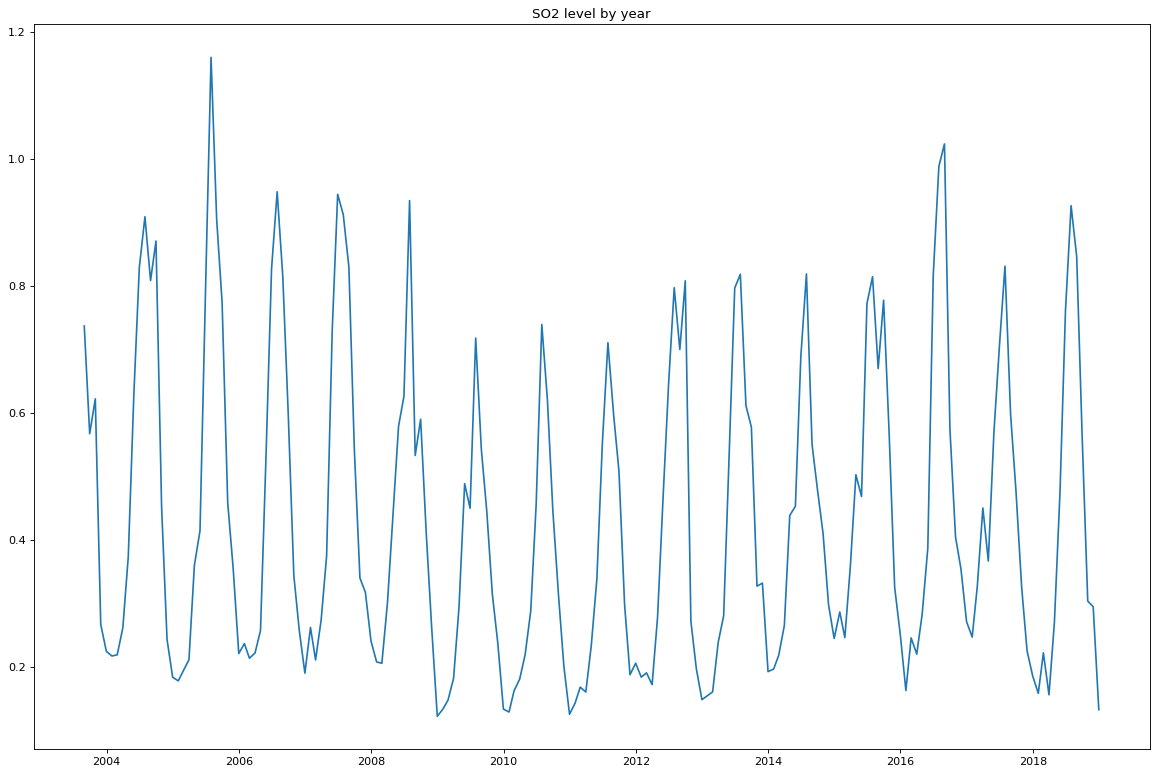

In [0]:
x=DF['Date']
y=DF['SO2']
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.title('SO2 level by year')
plt.show()

In [0]:
DF.reset_index(inplace=True)
DF['Date'] = pd.to_datetime(DF['Date'])
DF = DF.set_index('Date')

**decompose dataset**

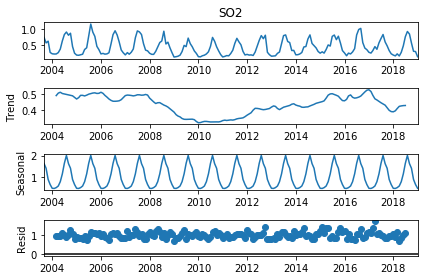

In [0]:
res = sm.tsa.seasonal_decompose(DF.SO2, model="multiplicative")
resplot = res.plot()

**Stationize the data set**
source from # https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

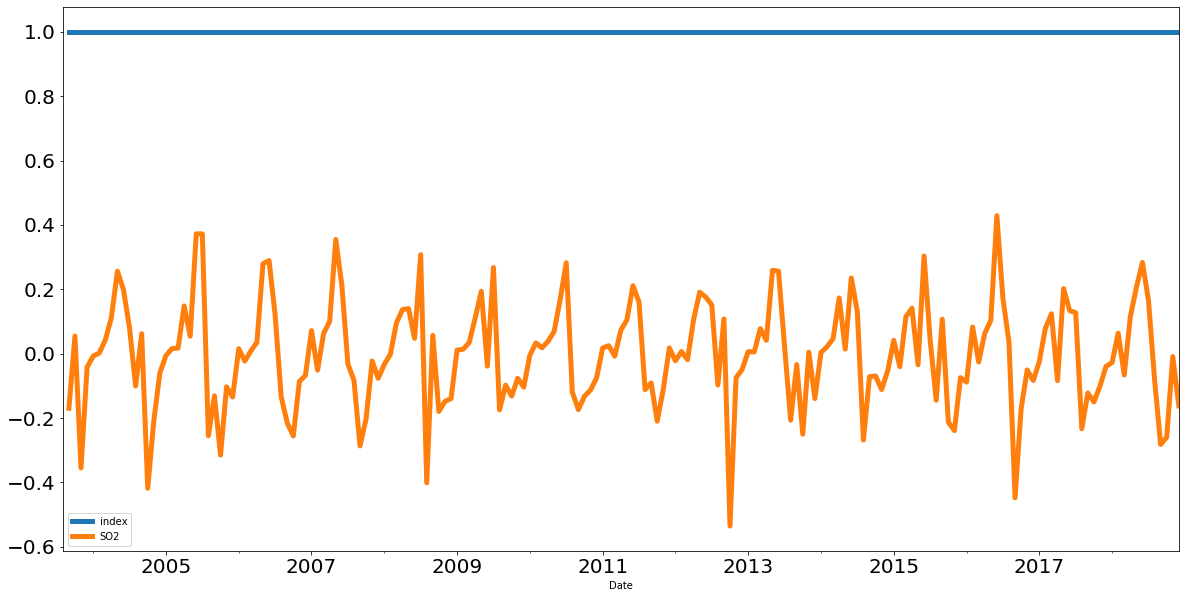

In [0]:
DF=DF.diff()
DF.plot(figsize=(20,10), linewidth=5, fontsize=20)

**AD fuller test to stationary**
source from https://machinelearningmastery.com/time-series-data-stationary-python/
, The ADF statistic less than the critical values, meaning the data set is stationary.

In [0]:

DF=DF.dropna()
X = DF['SO2'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.758482
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576


The significant spike at lag 1 in the ACF suggests a non-seasonal MA(1) component,and a spike at lag 5 in the ACF suggests a seasonal MA(1) component.# https://machinelearningmastery.com/time-series-forecast-case-study-python-monthly-armed-robberies-boston/

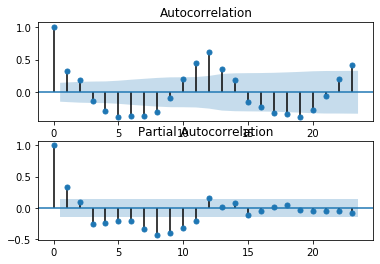

In [0]:

pyplot.figure()
pyplot.subplot(211)
plot_acf(DF['SO2'], ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(DF['SO2'], ax=pyplot.gca())
pyplot.show()

**Tune the ARIMA model’s parameters**


In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
model_output = pd.DataFrame(columns = ['parameters', 'results.aic'])

a = "bob"
b = "bob"
c = 1.0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #Only for diagnostic measures
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,
                                                  #param_seasonal, results.aic))
            a = param
            b = param_seasonal
            c = results.aic
            model_output = model_output.append({'parameters': 'ARIMA{}x{}12'.format(a, b),
                                                'results.aic': c}, ignore_index = True)
        except:
            continue

In [0]:
model_output.sort_values(by = 'results.aic').head(5)

,parameters,results.aic
61,"ARIMA(1, 1, 1)x(1, 0, 1, 12)12",-337.605802
37,"ARIMA(1, 0, 0)x(1, 0, 1, 12)12",-324.460615
29,"ARIMA(0, 1, 1)x(1, 0, 1, 12)12",-323.804400
45,"ARIMA(1, 0, 1)x(1, 0, 1, 12)12",-323.195740
35,"ARIMA(1, 0, 0)x(0, 1, 1, 12)12",-316.484459


In [0]:
#Fit the model with the lowest AIC above

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3396      0.094      3.604      0.000       0.155       0.524
ma.L1         -0.8934      0.057    -15.799      0.000      -1.004      -0.783
ar.S.L12       0.9802      0.008    118.771      0.000       0.964       0.996
ma.S.L12      -1.0002     51.858     -0.019      0.985    -102.639     100.639
sigma2         0.0062      0.323      0.019      0.985      -0.626       0.638


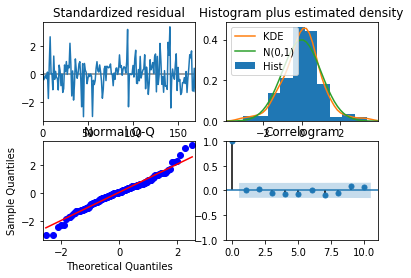

In [0]:
results.plot_diagnostics()
plt.show()
#Top left: Gaussian Noise
#Top right: KDE closely follows a normal distribution with a mean of 0 and an SD of 1-----N(0,1)
#Bottom left: Normal-looking Q-Q plot (i.e., data points follow the red line)
#Bottom right: 

In [0]:
#Validation - not dynamic 
pred = results.get_prediction(start=100, dynamic=False)
pred_ci = pred.conf_int()

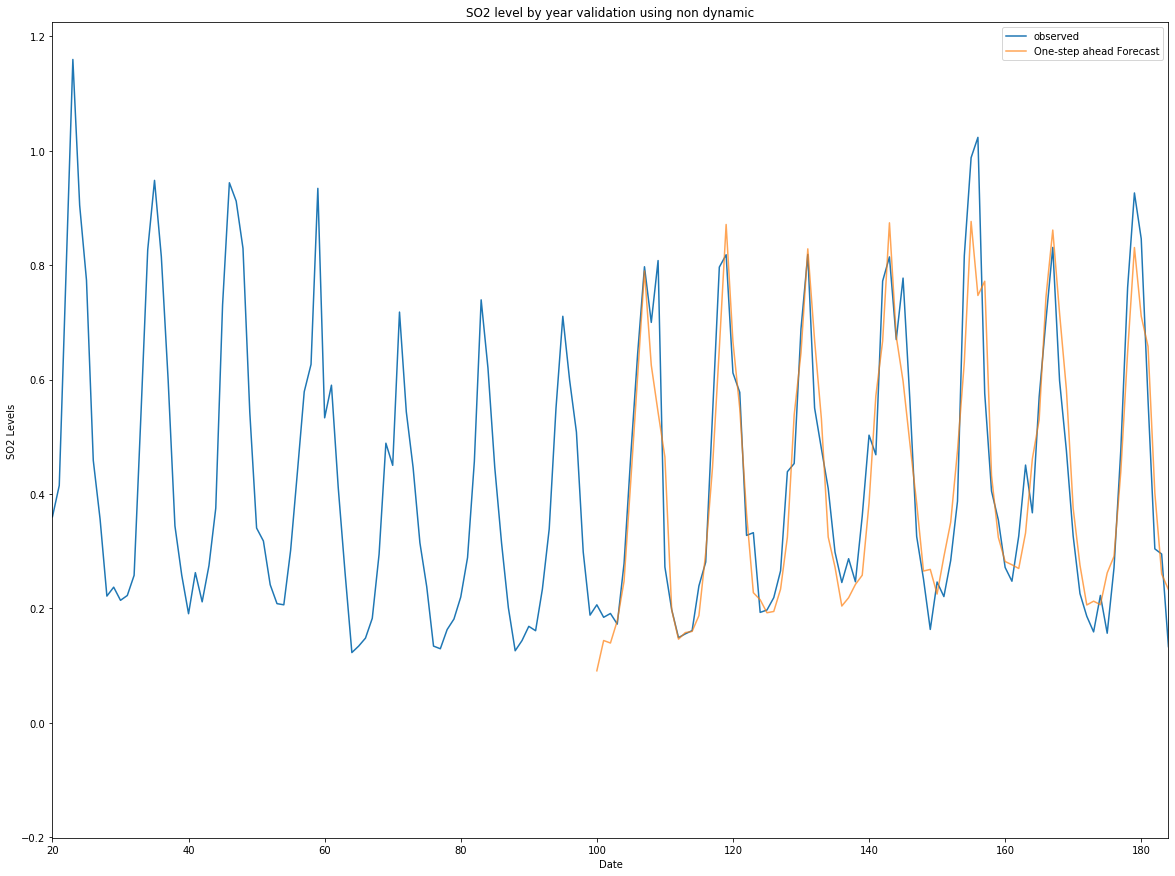

In [0]:
ax = y.iloc[20:].plot(label='observed',figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('SO2 Levels')
plt.title('SO2 level by year validation using non dynamic')
plt.legend()

In [0]:
#Performance Criteria
y_forecasted = pred.predicted_mean
y_truth = y[100:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [0]:
#Validation using dynamic forecast
pred_dynamic = results.get_prediction(start=100, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


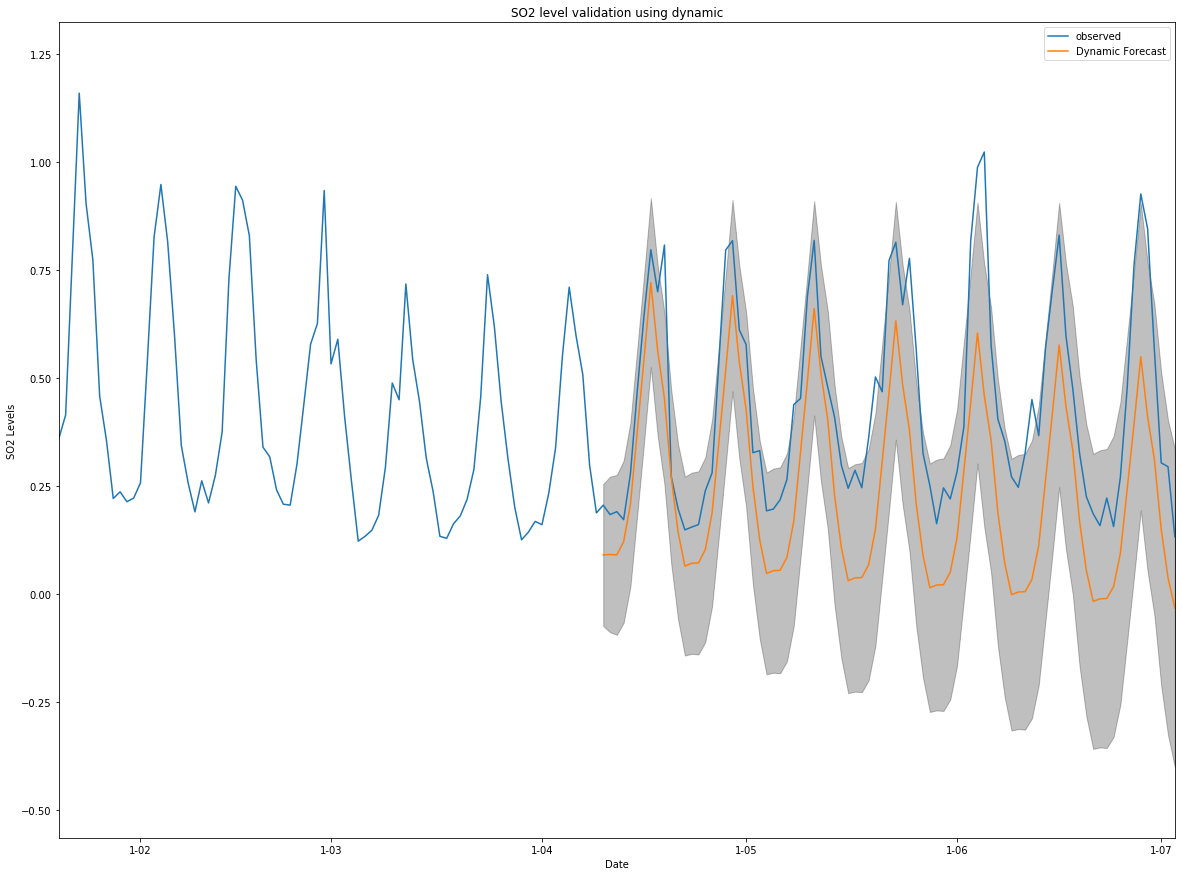

In [0]:
ax = y[20:].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-08-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('SO2 Levels')
plt.title('SO2 level validation using dynamic')
plt.legend()

In [0]:
#Performance Criteria
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[100:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.05


**Provide a forecast that extends forward for at least 10% of the time used in the analysis**

In [0]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

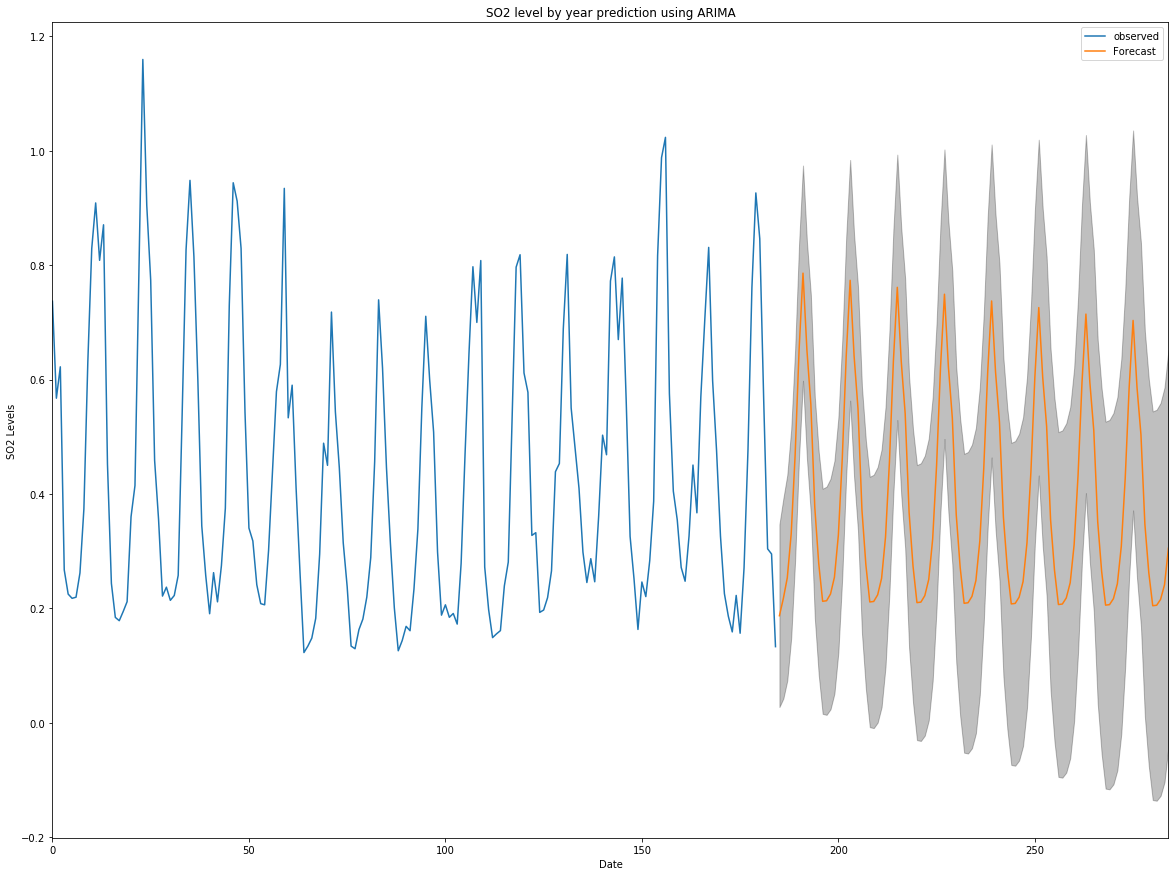

In [0]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SO2 Levels')
plt.title('SO2 level by year prediction using ARIMA')
plt.legend()

**Using Moving Average model.**
https://www.datacamp.com/community/tutorials/moving-averages-in-pandas


In [0]:
DF['pandas_SMA_3'] = DF['SO2'].rolling(window=3).mean()
DF['pandas_SMA_4'] = DF['SO2'].rolling(window=4).mean()
print(DF.head())

            index       SO2  pandas_SMA_3  pandas_SMA_4
Date                                                   
2003-09-30    1.0 -0.169452           NaN           NaN
2003-10-31    1.0  0.054875           NaN           NaN
2003-11-30    1.0 -0.355032     -0.156537           NaN
2003-12-31    1.0 -0.042271     -0.114143     -0.127970
2004-01-31    1.0 -0.007387     -0.134897     -0.087454


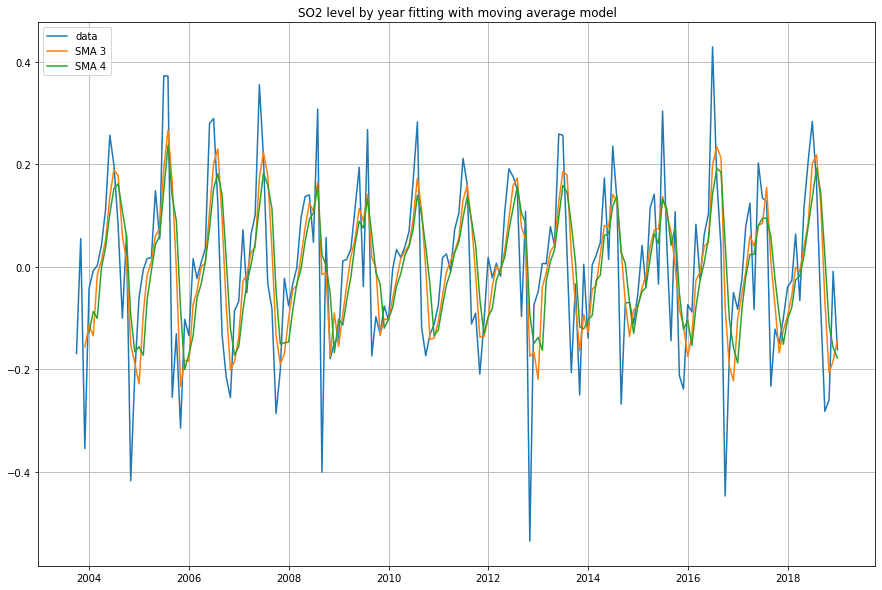

In [0]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(DF['SO2'],label='data')
plt.plot(DF['pandas_SMA_3'],label='SMA 3')
plt.plot(DF['pandas_SMA_4'],label='SMA 4')
plt.title('SO2 level by year fitting with moving average model')
plt.legend(loc=2)

**performance measures using MSE**
source from https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/


predicted=-0.156537, expected=-0.042271
predicted=-0.114143, expected=-0.007387
predicted=-0.134897, expected=0.001973
predicted=-0.015895, expected=0.042450
predicted=0.012345, expected=0.111714
predicted=0.052046, expected=0.256607
predicted=0.136924, expected=0.198786
predicted=0.189036, expected=0.079607
predicted=0.178333, expected=-0.100321
predicted=0.059357, expected=0.062131
predicted=0.013806, expected=-0.417960
predicted=-0.152050, expected=-0.208838
predicted=-0.188222, expected=-0.059476
predicted=-0.228758, expected=-0.005776
predicted=-0.091363, expected=0.015979
predicted=-0.016425, expected=0.017292
predicted=0.009165, expected=0.148482
predicted=0.060584, expected=0.054495
predicted=0.073423, expected=0.372564
predicted=0.191847, expected=0.372236
predicted=0.266432, expected=-0.254944
predicted=0.163285, expected=-0.130750
predicted=-0.004486, expected=-0.315163
predicted=-0.233619, expected=-0.102700
predicted=-0.182871, expected=-0.134464
predicted=-0.184109, expec

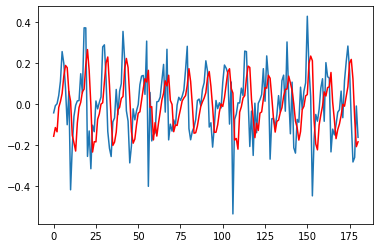

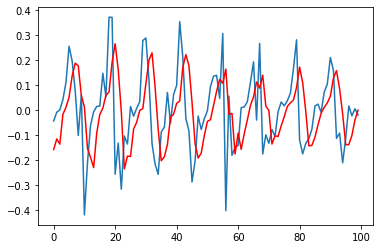

In [0]:

# prepare situation
X = DF['SO2']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

**Adopt Autoregression model to tune the data set and get the MSE**
,source from https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

Lag: 14
Coefficients: const     -0.002510
L1.SO2    -0.522437
L2.SO2    -0.475086
L3.SO2    -0.546136
L4.SO2    -0.541383
L5.SO2    -0.508483
L6.SO2    -0.432580
L7.SO2    -0.491575
L8.SO2    -0.577528
L9.SO2    -0.550618
L10.SO2   -0.376536
L11.SO2   -0.230528
L12.SO2    0.125181
L13.SO2    0.038199
L14.SO2    0.107056
dtype: float64
predicted=0.063705, expected=-0.027310
predicted=0.033144, expected=0.063750
predicted=0.080993, expected=-0.066062
predicted=0.071926, expected=0.114463
predicted=0.161414, expected=0.206100
predicted=0.078567, expected=0.283663
predicted=0.054595, expected=0.165397
predicted=-0.129519, expected=-0.080160
predicted=-0.132113, expected=-0.282120
predicted=-0.161840, expected=-0.259893
predicted=-0.070399, expected=-0.008937
predicted=-0.025810, expected=-0.161983
Test MSE: 0.012


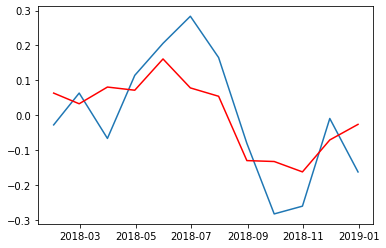

In [0]:

# split dataset
X = DF['SO2']
train, test = X[1:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**The best performace using least MSE as criteria is  ARIMA non-dynamic, followed by Autoregression model , moving average model and ARIMA dynamic.**
**After we found the least AIC, we tune the parameters of the ARIMA model.**

**Automate parameters**
source form https://datafai.com/auto-arima-using-pyramid-arima-python-package/

In [0]:

DF=DF.dropna()
X = DF['SO2'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.912920
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


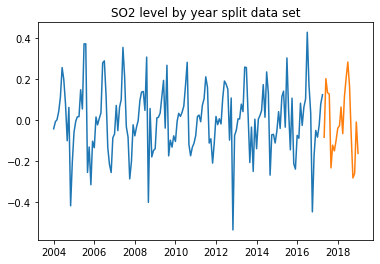

In [0]:
X=DF['SO2']
train,test=X[:160],X[160:]
plt.plot(train)
plt.plot(test)
plt.title('SO2 level by year split data set')
plt.show();

In [0]:
Arima_model=auto_arima(train, start_p=1,start_q=1,max_p=8,
                       max_q=8,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,d=1,D=1,
                       error_action='warn',suppress_warnings=True,
                       stepwise=True,random_state=20,n_fits=30)
Arima_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-197.720, BIC=-185.758, Fit time=1.120 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-53.790, BIC=-47.809, Fit time=0.155 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-116.416, BIC=-104.455, Fit time=0.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-228.424, BIC=-216.462, Fit time=2.384 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-228.898, BIC=-213.946, Fit time=3.036 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-194.982, BIC=-183.020, Fit time=1.077 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-231.368, BIC=-213.425, Fit time=7.001 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 3, 12); AIC=-225.790, BIC=-201.866, Fit time=15.017 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-241.498, BIC=-220.565, Fit time=8.259 seconds
Fit ARIMA: order=(1, 1, 0) se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  160
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 132.042
Date:                                 Tue, 11 Feb 2020   AIC                           -246.083
Time:                                         21:13:56   BIC                           -219.169
Sample:                                              0   HQIC                          -235.148
                                                 - 160                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.416      0.677      -0.000       0.001
ar.L1         -0.3872      0.101     -3.847      0.000      -0.585      -0.190
ar.L2         -0.2615      0.095     -2.755      0.006      -0.447      -0.075
ar.L3         -0.1733      0.102     -1.706      0.088      -0.372       0.026
ma.L1         -0.9628      0.115     -8.404      0.000      -1.187      -0.738
ar.S.L12      -0.7764      0.247     -3.140      0.002      -1.261      -0.292
ma.S.L12      -0.0779      2.762     -0.028      0.977      -5.492       5.336
ma.S.L24      -0.9126      2.419     -0.377      0.706      -5.654       3.829
sigma2         0.0075      0.020      0.377      0.706      -0.032       0.047
===================================================================================
Ljung-Box (Q):                       55.60   Jarque-Bera (JB):                 8.36
Prob(Q):                              0.05   Prob(JB):                         0.02
Heteroskedasticity (H):               1.11   Skew:                            -0.34
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

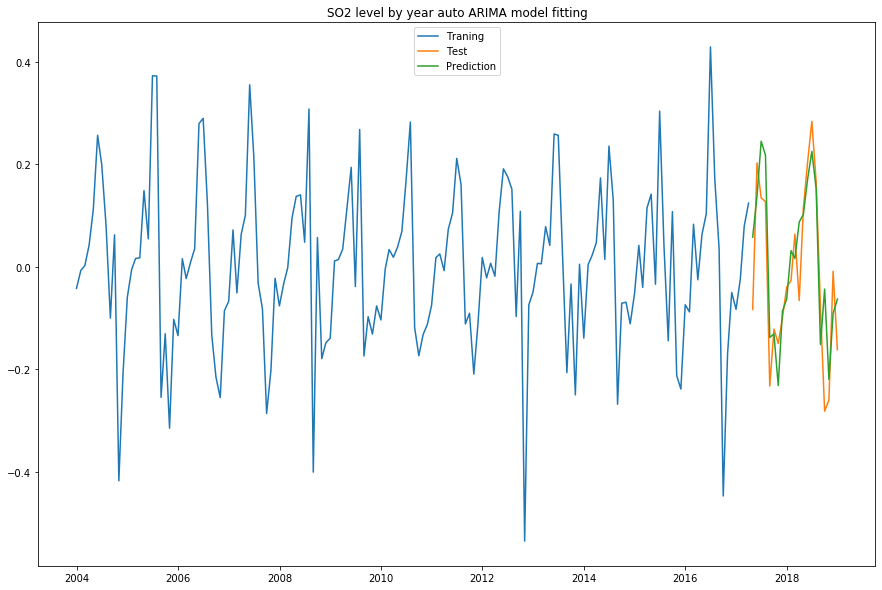

In [0]:
prediction =pd.DataFrame(Arima_model.predict(n_periods=21)
                         ,index = test.index)
prediction.columns =['SO2']
plt.figure(figsize=(15,10))
plt.plot(train, label ='Traning')
plt.plot(test, label ='Test')
plt.plot(prediction, label ='Prediction')
plt.legend(loc ='upper center')
plt.title('SO2 level by year auto ARIMA model fitting')
plt.show();

**The MSE shows that auto ARIMA has the best performance so far.** 

In [0]:
error = mean_squared_error(test, prediction)
print('Test MSE: %.3f' % error)

Test MSE: 0.008


In [0]:
#Fit the model with the sarima above

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 1),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

**Rerun the forecast**

In [0]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

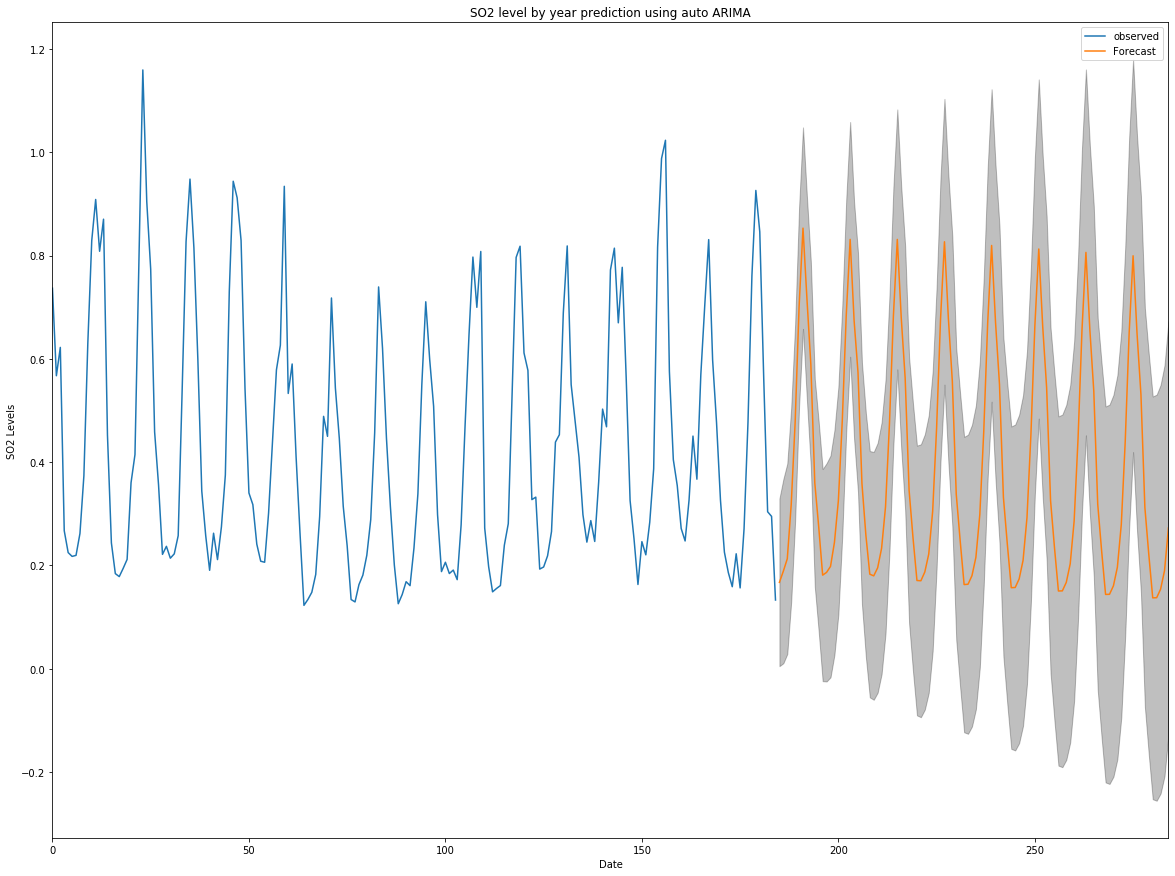

In [0]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SO2 Levels')
plt.title('SO2 level by year prediction using auto ARIMA')
plt.legend()

**Key Take away**:


*   Since the data set(SO2 level) is seasonal, we adopt seasonal ARIMA model to analyze it. The best performed model is using auto ARIMA rather than the moving average or autoregressioin. The MSE is used as criteria.
*   The time series model predict the next few years of data. The seasonal trend will be exsited. The SO2 level still peak at mid term of the year and is lowerst at the begining and the end. 
*   The Autocorrelation and partial autocorrelation can be the first step to tune the parameters of the ARIMA model 

**Part 2a**

In [0]:
url = "https://docs.google.com/spreadsheets/d/1t4bZMeNzWhEth1N1dpDL5VDQMZ4bvofK6QE1-2YGgQk/gviz/tq?tqx=out:csv"
fopen = requests.get(url).content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')))
print(ds.head())

   Period   Value
0  Q1 '07  1.6610
1  Q2 '07  1.5895
2  Q3 '07  1.7930
3  Q4 '07  3.1185
4  Q1 '08  2.2770


In [0]:
DS =pd.DataFrame()
DS ['Value'] =ds ['Value']
date=pd.date_range("2007-01-01", "2017-12-31", freq="3MS")
DS['Period']=pd.DataFrame(date)
print(DS.tail())

      Value     Period
39  24.0570 2016-10-01
40  19.6405 2017-01-01
41  20.8780 2017-04-01
42  24.0570 2017-07-01
43  33.2750 2017-10-01


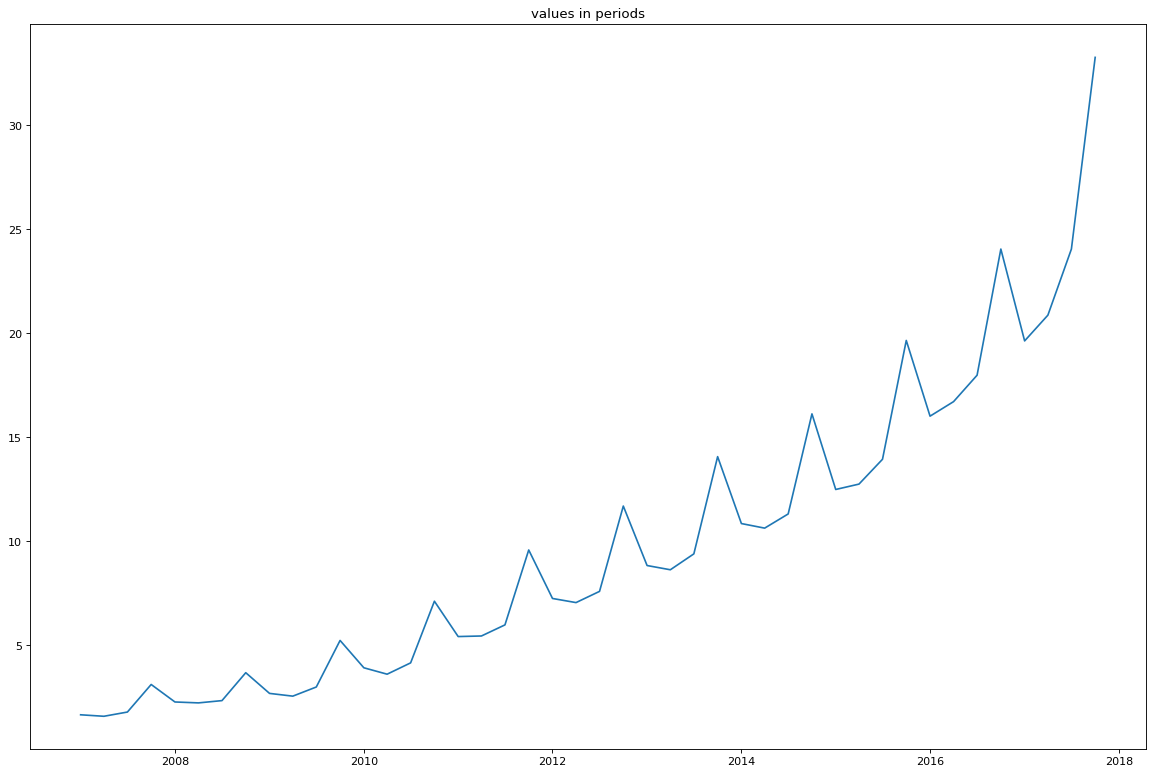

In [0]:
x=DS['Period']
y=DS['Value']
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.title('values in periods')
plt.show()


The data has trend and seasonality. So we first logarithmize the data and remove the seasonality.

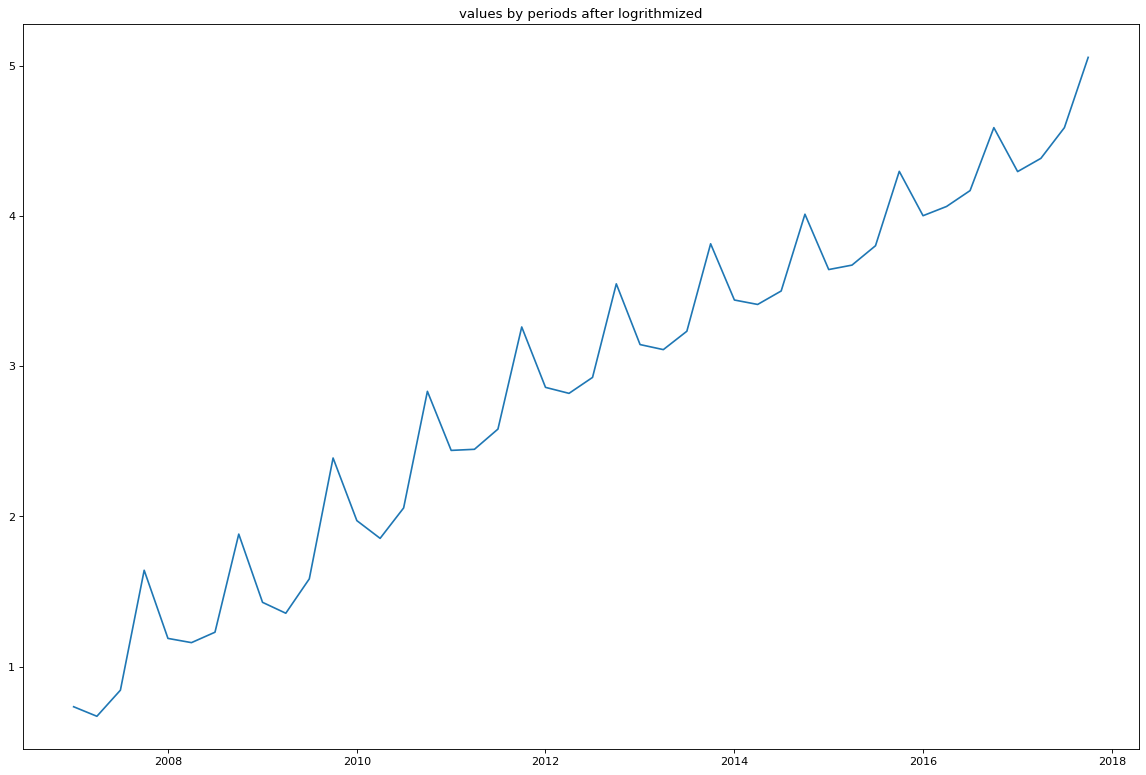

In [0]:
DS['Value']=np.log2(DS['Value'])
x=DS['Period']
y=DS['Value']
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.title('values by periods after logrithmized')
plt.show()

In [0]:
DS.reset_index(inplace=True)
DS['Period'] = pd.to_datetime(DS['Period'])
DS = DS.set_index('Period')

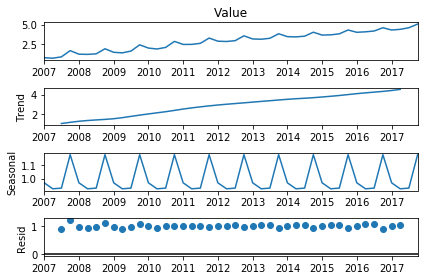

In [0]:
res = sm.tsa.seasonal_decompose(DS.Value, model="multiplicative")
resplot = res.plot()

Adopted second differencing to stationzie the data set,
sourse from # https://stackoverflow.com/questions/54505175/calculating-second-order-derivative-from-timeseries-using-pandas-diff

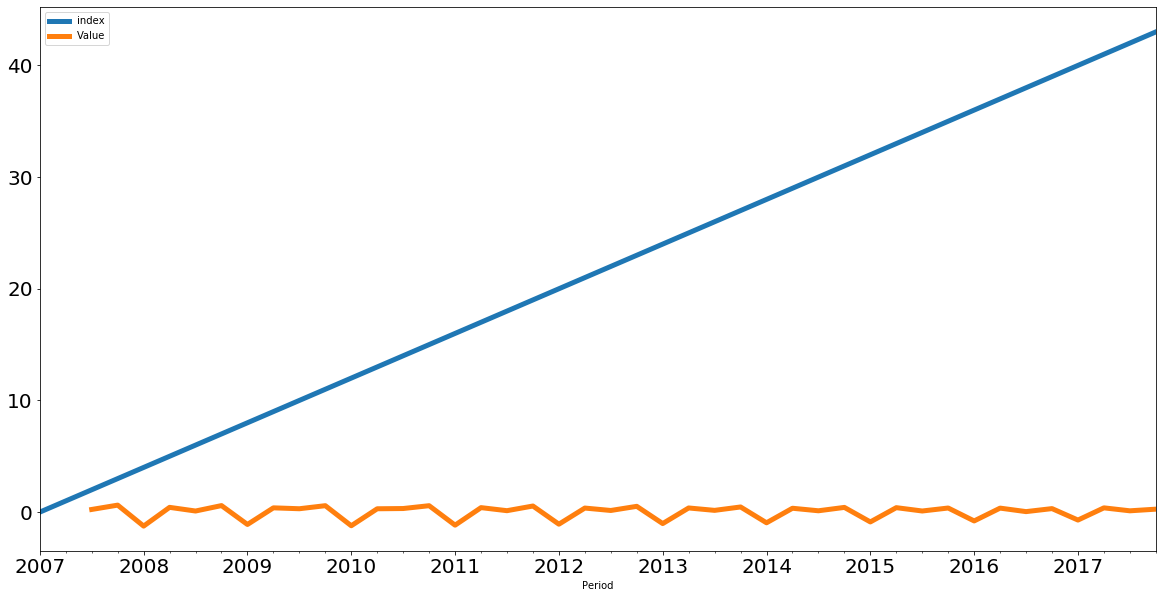

In [0]:

DS['Value'] = DS['Value'] - 2*DS['Value'].shift(1) + DS['Value'].shift(2)
DS.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [0]:
from statsmodels.tsa.stattools import adfuller
DS=DS.dropna()
X = DS['Value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.336276
p-value: 0.000384
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
model_output = pd.DataFrame(columns = ['parameters', 'results.aic'])

a = "bob"
b = "bob"
c = 1.0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #Only for diagnostic measures
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,
                                                  #param_seasonal, results.aic))
            a = param
            b = param_seasonal
            c = results.aic
            model_output = model_output.append({'parameters': 'ARIMA{}x{}12'.format(a, b),
                                                'results.aic': c}, ignore_index = True)
        except:
            continue

In [0]:
model_output.sort_values(by = 'results.aic').head(5)

,parameters,results.aic
28,"ARIMA(0, 1, 1)x(1, 0, 0, 12)12",-81.230937
44,"ARIMA(1, 0, 1)x(1, 0, 0, 12)12",-79.347879
20,"ARIMA(0, 1, 0)x(1, 0, 0, 12)12",-77.940291
52,"ARIMA(1, 1, 0)x(1, 0, 0, 12)12",-77.254193
36,"ARIMA(1, 0, 0)x(1, 0, 0, 12)12",-76.647503


In [0]:
#Fit the model with the lowest AIC above

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4304      0.167      2.570      0.010       0.102       0.759
ar.S.L12       0.8619      0.025     35.134      0.000       0.814       0.910
sigma2         0.0035      0.001      2.356      0.018       0.001       0.006


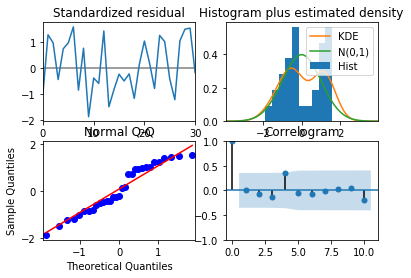

In [0]:
results.plot_diagnostics()
plt.show()

In [0]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

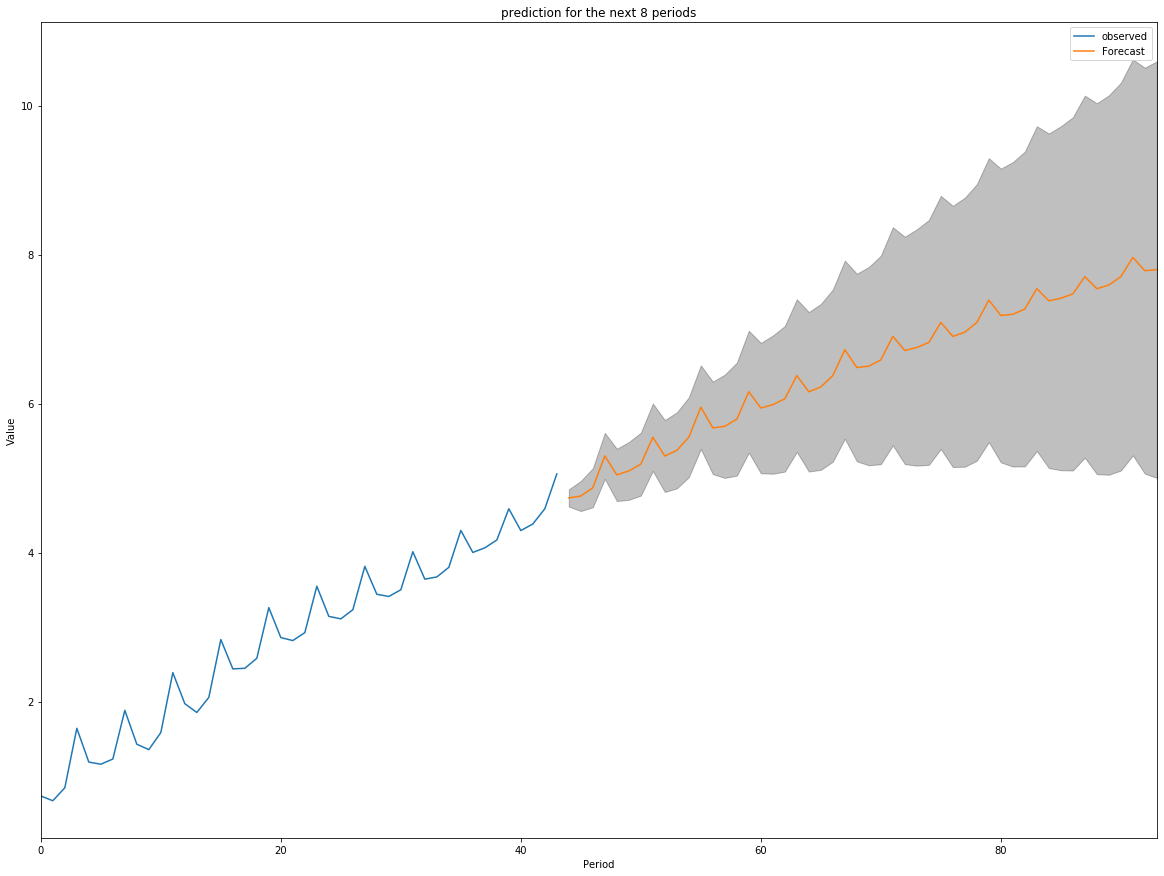

In [0]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Period')
ax.set_ylabel('Value')
plt.title('prediction for the next 8 periods')
plt.legend()

Analyze the following data set and predict the values for the subsequent 7 years

In [0]:
url = "https://docs.google.com/spreadsheets/d/1sk381Coa7JhZIgSVcb_Xy98IY1vb1IXc5l-5awggavI/gviz/tq?tqx=out:csv"
fopen = requests.get(url).content
DaS=pd.read_csv(io.StringIO(fopen.decode('utf-8')))
print(DaS.head())

       Period   Electro
0  11/17/1971  0.023082
1   4/23/1972  0.035545
2    5/1/1974  0.060976
3   7/28/1979  0.291638
4   4/24/1982  1.357727


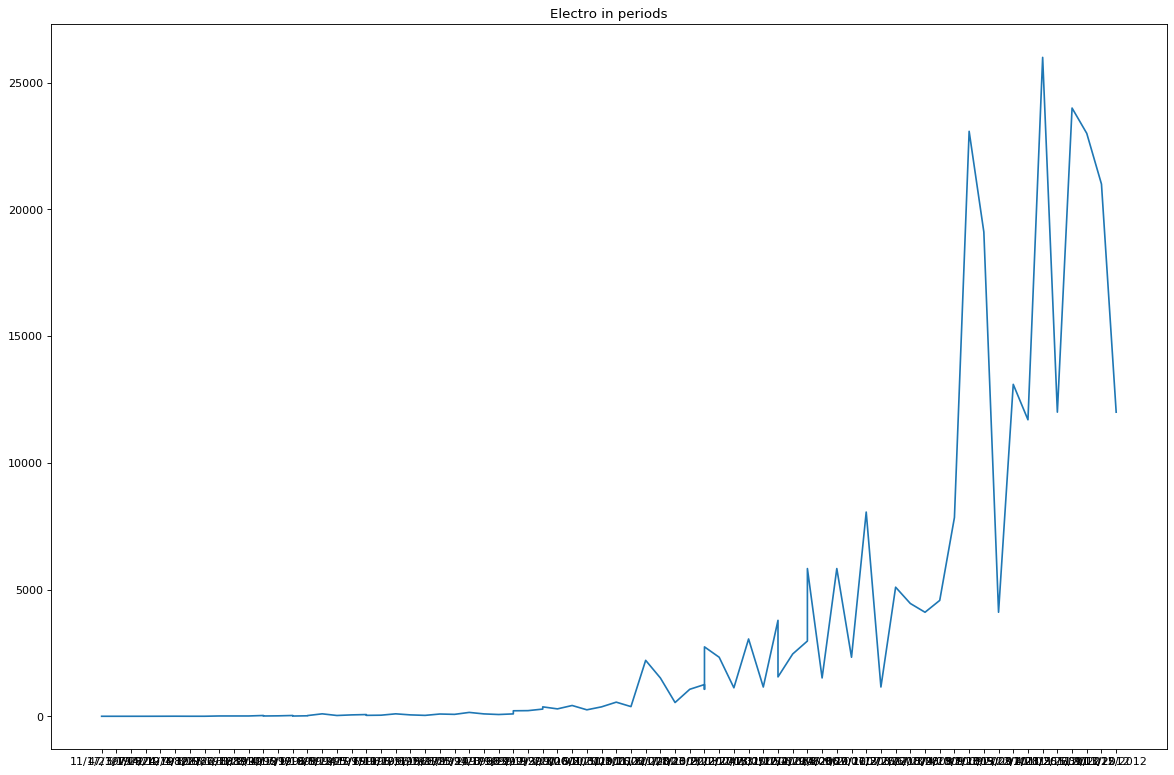

In [0]:
x=DaS['Period']
y=DaS['Electro']
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.title('Electro in periods')
plt.show()

Detrend the data and stationarize, source from # https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

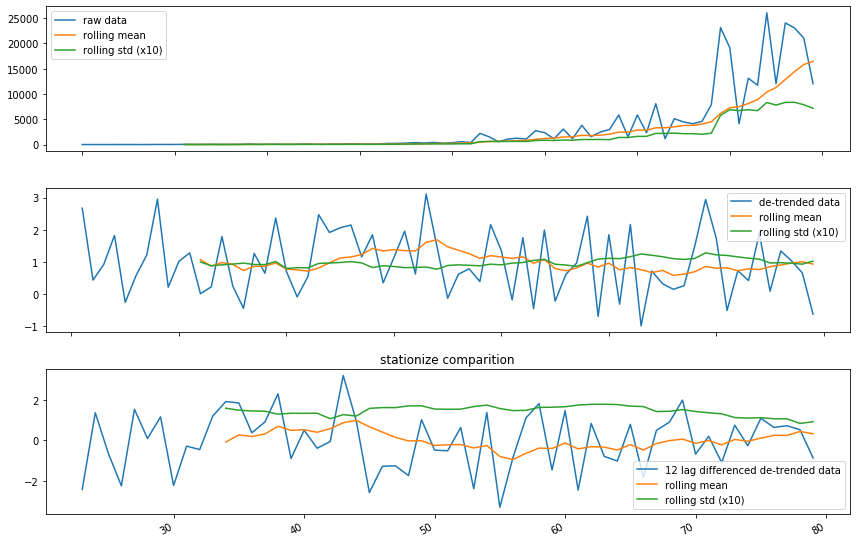

In [0]:
DaS['Electro_'] = (DaS['Electro'] - DaS.Electro.rolling(window=12).mean()) / DaS.Electro.rolling(window=12).std()
DaS['Electro_z']= DaS['Electro_'] - DaS['Electro_'].shift(12)

fig, ax = plt.subplots(3,figsize=(12, 9))
ax[0].plot(DaS.index, DaS.Electro, label='raw data')
ax[0].plot(DaS.Electro.rolling(window=12).mean(), label="rolling mean");
ax[0].plot(DaS.Electro.rolling(window=12).std(), label="rolling std (x10)");
ax[0].legend()

ax[1].plot(DaS.index, DaS.Electro_, label="de-trended data")
ax[1].plot(DaS.Electro_.rolling(window=12).mean(), label="rolling mean");
ax[1].plot(DaS.Electro_.rolling(window=12).std(), label="rolling std (x10)");
ax[1].legend()

ax[2].plot(DaS.index, DaS.Electro_z, label="12 lag differenced de-trended data")
ax[2].plot(DaS.Electro_z.rolling(window=12).mean(), label="rolling mean");
ax[2].plot(DaS.Electro_z.rolling(window=12).std(), label="rolling std (x10)");
ax[2].legend()
plt.title('stationize comparition')
plt.tight_layout()
fig.autofmt_xdate()

In [0]:


print(" > Is the data stationary ?")
dftest = adfuller(DaS.Electro, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the de-trended data stationary ?")
dftest = adfuller(DaS.Electro_.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(DaS.Electro_z.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = 3.173
P-value = 1.000
Critical values :
	1%: -3.5319549603840894 - The data is not stationary with 99% confidence
	5%: -2.905755128523123 - The data is not stationary with 95% confidence
	10%: -2.5903569458676765 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -9.770
P-value = 0.000
Critical values :
	1%: -3.530398990560757 - The data is  stationary with 99% confidence
	5%: -2.9050874099328317 - The data is  stationary with 95% confidence
	10%: -2.5900010121107266 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -2.394
P-value = 0.143
Critical values :
	1%: -3.584828853223594 - The data is not stationary with 99% confidence
	5%: -2.9282991495198907 - The data is not stationary with 95% confidence
	10%: -2.6023438271604937 - The data is not stationary with 90% confidence


The second detrend data is stationary and can be used.

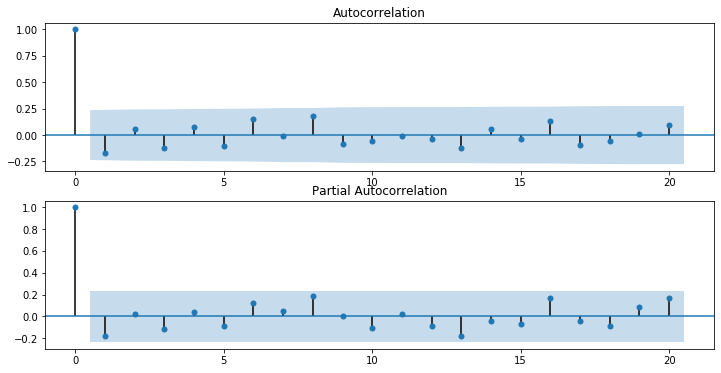

In [0]:

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(DaS.Electro_.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(DaS.Electro_.dropna(), ax=ax[1], lags=20)

In [0]:
from statsmodels.tsa.stattools import adfuller
DaS=DaS.dropna()
X = DaS['Electro_'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.619490
p-value: 0.000000
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595


In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
model_output = pd.DataFrame(columns = ['parameters', 'results.aic'])

a = "bob"
b = "bob"
c = 1.0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #Only for diagnostic measures
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,
                                                  #param_seasonal, results.aic))
            a = param
            b = param_seasonal
            c = results.aic
            model_output = model_output.append({'parameters': 'ARIMA{}x{}12'.format(a, b),
                                                'results.aic': c}, ignore_index = True)
        except:
            continue

In [0]:
model_output.sort_values(by = 'results.aic').head(5)

,parameters,results.aic
31,"ARIMA(0, 1, 1)x(1, 1, 1, 12)12",1017.045098
63,"ARIMA(1, 1, 1)x(1, 1, 1, 12)12",1024.492354
27,"ARIMA(0, 1, 1)x(0, 1, 1, 12)12",1025.507843
59,"ARIMA(1, 1, 1)x(0, 1, 1, 12)12",1026.553420
43,"ARIMA(1, 0, 1)x(0, 1, 1, 12)12",1039.060805


In [0]:
#Fit the model with the lowest AIC above

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6937      0.087     -8.010      0.000      -0.863      -0.524
ar.S.L12       2.0533      0.380      5.397      0.000       1.308       2.799
sigma2      1.344e+07   1.39e+06      9.638      0.000    1.07e+07    1.62e+07


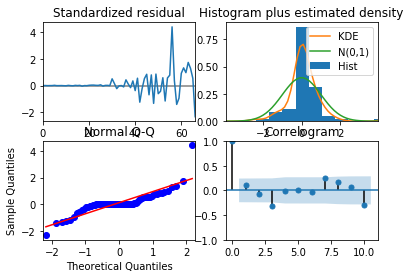

In [0]:
results.plot_diagnostics()
plt.show()

In [0]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=300)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

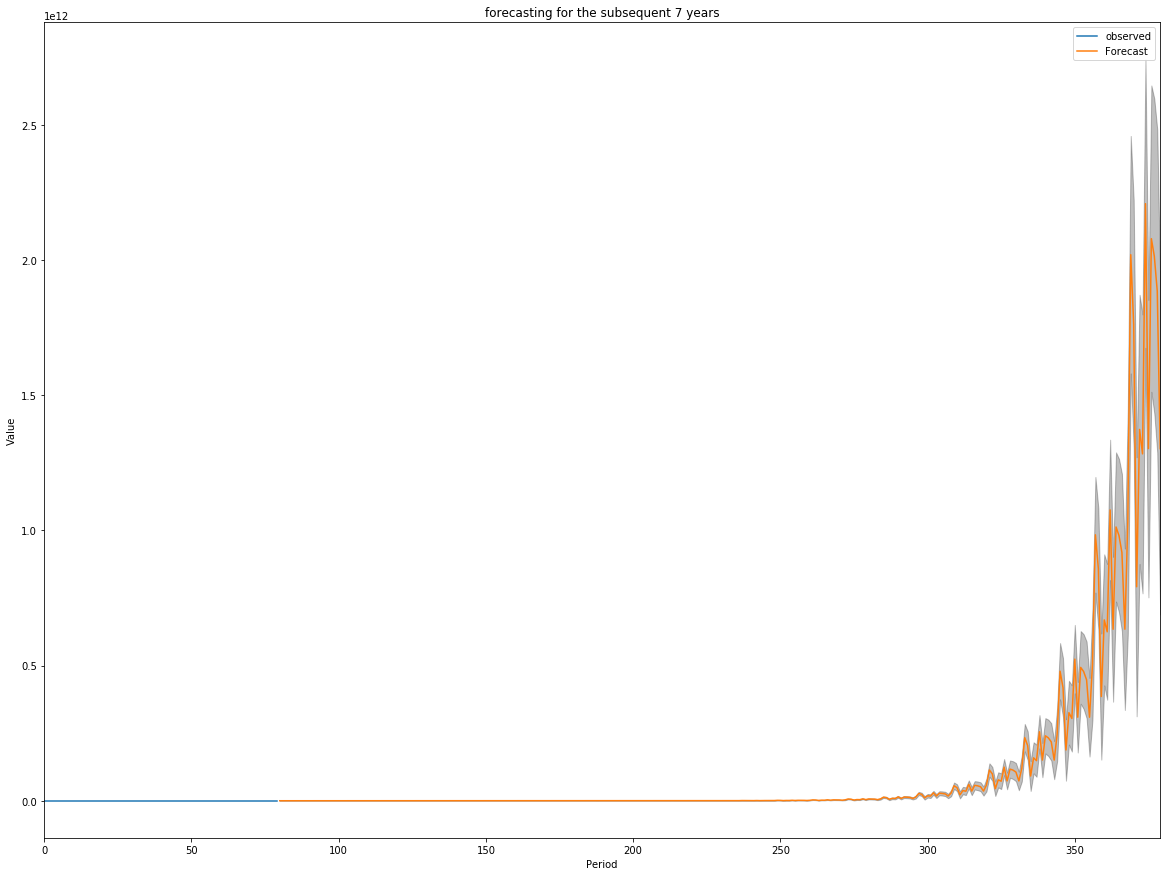

In [0]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Period')
ax.set_ylabel('Value')
plt.title('forecasting for the subsequent 7 years')
plt.legend()